# [NLP] Assignment 1: Tokenization

In this assignment, you need to tokenize the text of the Twitter(X) users posts(tweets). The assignment consists of two tasks. When you finish all the tasks, create a GitHub repository for this assignment (you can use this repo later for the other assignments) and submit this notebook in the repository. Leave `requirements.txt` file if your code requires additional installations. Submit the link to the repository in Moodle.

The [data](https://drive.google.com/file/d/15x_wPAflvYQ2Xh38iNQGrqUIWLj5l5Nw/view?usp=share_link) contains 5 files whereby each contains 44 tweets. Each tweet is separated by a newline.

## Task 1. Tokenize some tweets manually (20 points)

As a first task you need to tokenize first 15 tweets from `file2` by hand. This will allow you to understand the problem from a linguistic point of view. The guidelines for tweet tokenization are as follows:

- Each smiley is a separate token
- Each hashtag is an individual token. Each user reference is an individual token
- If a word has spaces between them then it is converted to a single token
- All punctuations are individual tokens. This includes double-quotes and single quotes also
- A URL is a single token

Example of output

    Input tweet
    @xfranman Old age has made N A T O!

    Tokenized tweet (separated by comma)
    @xfranman , Old , age , has , made , NATO , !

```
1. Input tweet
Camping in Maine for the weekend. Hey Dad, Mama Loves YOU: http://www.mamapalooza.com

1. Tokenized tweet
Camping, in, Maine, for, the, weekend, ., Hey, Dad, ,, Mama, Loves, YOU, :, http://www.mamapalooza.com

2. Input tweet
Its american tradition bitch

2. Tokenized tweet
Its, american, tradition, bitch

3. Input tweet
@ThroughTheVoid They love it! The only pleasure they get in life. I actually do that. I'm sure I hear a tiny squeak... Then louder ones

3. Tokenized tweet
@ThroughTheVoid, They, love, it, !, The, only, pleasure, they, get, in, life, ., I, actually, do, that, ., I, ', m, sure, I, hear, a, tiny, squeak, ..., Then, louder, ones

4. Input tweet
" RT @latti: @AbsoHilare stop tweeting in church! Lol <--- ""I tweet because I'm happy, I tweet because I'm free"" LOL!"

4. Tokenized tweet
", RT, @latti, :, @AbsoHilare, stop, tweeting, in, church, !, Lol, <---, ", ", I, tweet, because, I, ', m, happy, ,, I, tweet, because, I, ', m, free, ", ", LOL, !, "

5. Input tweet
Samsung Mini S2 portable HDD graced with colors that perfectly match your tacky beach gear: Sammy's done it aga.. http://tinyurl.com/lb5p6m

5. Tokenized tweet
Samsung, Mini, S2, portable, HDD, graced, with, colors, that, perfectly, match, your, tacky, beach, gear, :, Sammy, ', s, done, it, aga, .., http://tinyurl.com/lb5p6m

6. Input tweet
@dialloc congrats on finding your way over. it may be slow going at first. hang in there. it's kinda cool when u get up to speed.

6. Tokenized tweet
@dialloc, congrats, on, finding, your, way, over, ., it, may, be, slow, going, at, first, ., hang, in, there, ., it, ', s, kinda, cool, when, u, get, up, to, speed, .

7. Input tweet
iPhone activation delays continue, Apple offers $30 http://twt.gs/l3Ki

7. Tokenized tweet
iPhone, activation, delays, continue, ,, Apple, offers, $, 30, http://twt.gs/l3Ki
8.
8. Input tweet
RT @GoogleAtWork Gmail maximum attachment size now 25MB http://bit.ly/62mjw Nice!!!

8. Tokenized tweet
RT, @GoogleAtWork, Gmail, maximum, attachment, size, now, 25, MB, http://bit.ly/62mjw, Nice, !, !, !

9. Input tweet
RT @acfou The Ads Won Awards for Crispin; But Did Nothing for Client BurgerKing's Sales/Marketshare - Big Surprise - http://ping.fm/vw8TI

9. Tokenized tweet
RT, @acfou, The, Ads, Won, Awards, for, Crispin, ;, But, Did, Nothing, for, Client, BurgerKing, ', s, Sales, /, Marketshare, -, Big, Surprise, -, http://ping.fm/vw8TI

10. Input tweet
Hey doll! Great I missed True Blood yday boo lol Rt @FrankBanuat78 @jhillstephens Hello Sunshine how are u today? :-)

10. Tokenized tweet
Hey, doll, !, Great, I, missed, True, Blood, yday, boo, lol, Rt, @FrankBanuat78, @jhillstephens, Hello, Sunshine, how, are, u, today, ?, :-)

11. Input tweet
Australian artist Pogo made these free songs primarily from sampled audio from Alice In Wonderland. http://www.last.fm/music/Pogo/Wonderland

11. Tokenized tweet
Australian, artist, Pogo, made, these, free, songs, primarily, from, sampled, audio, from, Alice, In, Wonderland, ., http://www.last.fm/music/Pogo/Wonderland

12. Input tweet
@mppritchard they wanted to sell all the preorders & then sell all of the ones they had in stock to those that just walked in. Can't do both

12. Tokenized tweet
@mppritchard, they, wanted, to, sell, all, the, preorders, &, then, sell, all, of, the, ones, they, had, in, stock, to, those, that, just, walked, in, ., Can, ', t, do, both

13. Input tweet
Incoming: Frightened Rabbit, Sept. 22 (Tucson): If Fat Cat Records is going to send three great bands from Scot.. http://tinyurl.com/nz6xcv

13. Tokenized tweet
Incoming, :, Frightened, Rabbit, ,, Sept, ., 22, (, Tucson, ), :, If, Fat, Cat, Records, is, going, to, send, three, great, bands, from, Scot, .., http://tinyurl.com/nz6xcv

14. Input tweet
Hey @ginoandfran please greet philip! (GinoandFran live > http://ustre.am/2YyQ)

14. Tokenized tweet
Hey, @ginoandfran, please, greet, philip, !, (, GinoandFran, live, >, http://ustre.am/2YyQ, )

15, Input tweet
Ik weet niet wie er achter de T-Mobile iPhone Twitter zit maar ik vind het niet echt 'corporate' taalgebruik... Best vreemd eigenlijk

15, Tokenized tweet
Ik, weet, niet, wie, er, achter, de, T-Mobile, iPhone, Twitter, zit, maar, ik, vind, het, niet, echt, ', corporate, ', taalgebruik, ..., Best, vreemd, eigenlijk
```

## Task 2. Implement [Byte-Pair Encoding(BPE)](https://arxiv.org/pdf/1508.07909.pdf) Tokenizer (80 points)

### Task 2.1. Implementation (60 points)

Implement the tokenizer as the BPETokenizer class:
* Implement `train` method that learns merges and builds the vocabulary of the specified `vocab_size` (25 points).
* Implement `tokenize` method that should tokenize the text according to the learnt merges (25 points).

Your code should have docstrings and comments (10 points).

In [1]:
from collections import Counter
from typing import List, Tuple

class BPETokenizer:
    """
    Byte Pair Encoding (BPE) Tokenizer class for vocabulary creation and
    text tokenization.
    """

    def __init__(self, vocab_size: int) -> None:
        """
        Initializes the BPETokenizer with a specified vocabulary size.

        Parameters:
        - vocab_size (int): The desired size of the vocabulary.
        """
        self.vocab_size = vocab_size
        self.vocab = []

    def popular_bigram(self, corpus: List[str]) -> Tuple[str, str]:
        """
        Finds the most popular bigram in the given corpus, excluding bigrams
        starting with '_' (parts of different words cannot be a part of single
        token).

        Parameters:
        - corpus (List[str]): A list of strings representing the corpus.

        Returns:
        Tuple[str, str]: The most popular bigram as a tuple of two consecutive
        characters.
        """
        bigrams = Counter()

        for i in range(len(corpus) - 1):
            # Count bigrams except for multiword ones
            if corpus[i][-1] != "_":
                bigrams[tuple(corpus[i:i+2])] += 1

        # Return most popular bigram if there is any
        ret = bigrams.most_common(1)
        return ret[0][0] if len(ret) else None

    def train(self, corpus: List[str]) -> None:
        """
        Trains the tokenizer on the given corpus to create a vocabulary.

        Parameters:
        - corpus (List[str]): A list of strings representing the training corpus.
        """
        # Prepare the corpus
        corpus = " ".join(corpus)
        corpus = [*("_".join(corpus.split()) + "_")]
        size = len(set(corpus))

        # Add tokens to the vocabulary until we reach vocab_size
        for k in range(size, self.vocab_size):
            bigram = self.popular_bigram(corpus)

            # Break if no new bigrams were found
            if bigram is None:
                break

            # Add bigram to vocabulary
            self.vocab.append(bigram)

            # Replace the bigrams by new token
            token = "".join(bigram)
            i = 0
            while i < len(corpus) - 1:
                if corpus[i] == bigram[0] and corpus[i+1] == bigram[1]:
                    del corpus[i+1]
                    corpus[i] = token
                i += 1

    def tokenize(self, text: str) -> List[str]:
        """
        Tokenizes the input text using the vocabulary learned during training.

        Parameters:
        - text (str): The input text to be tokenized.

        Returns:
        List[str]: A list of tokens generated from the input text.
        """
        # Prepare the text
        text = [*("_".join(text.split()) + "_")]

        # Replace all known bigrams in the learnt order
        for bigram in self.vocab:
            token = "".join(bigram)
            i = 0

            # Replace all occurences of the bigram by the corresponding token
            while i < len(text) - 1:
                if text[i] == bigram[0] and text[i+1] == bigram[1]:
                    del text[i+1]
                    text[i] = token
                i += 1

        return text


Test with example from the lecture

In [2]:
corpus = ["low low low low low lowest lowest newer newer newer newer newer newer wider wider wider new new"]
bpe = BPETokenizer(8 + len(set(corpus[0])))
bpe.train(corpus)

print(bpe.tokenize("newer lower"))

['newer_', 'low', 'er_']


### Task 2.2. Analysis on Tweets Dataset (10 points)

Train the BPE tokenizer on the tweets dataset. Try to tokenize the tweets with the tokenizer of different `vocab_size`. For example, train the BPE tokenizer with `vocab_size` of [base_vocab_size, 250, 500, 750, 1000]. Plot the dependency of the average length of the tokenized tweet by `vocab_size` to analyze how `vocab_size` affects the length of the tokenized tweet on average. Tell what `vocab_size` is preferrable and why.

In [5]:
sizes = [
    0, # The vocab size cannot be lower than base_vocab_size, so it will be the same
    100,
    200,
    250,
    300,
    400,
    500,
    600,
    700,
    750,
    800,
    900,
    1000,
    1100,
    1200,
    1300,
    1400,
    1500
    ]

corpus = []
for i in range(1, 6):
    with open(f"file{i}", "r") as f:
        corpus += f.readlines()

In [6]:
ave_lengths = []

for s in sizes:
    bpe = BPETokenizer(s)
    bpe.train(corpus)
    sm = 0
    for tweet in corpus:
        sm += len(bpe.tokenize(tweet))
    ave_lengths.append(sm / len(corpus))

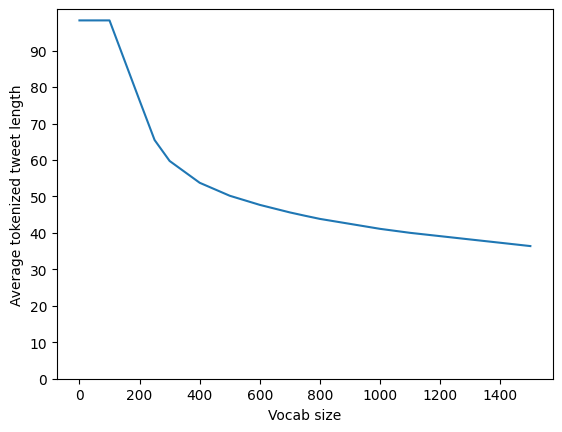

In [7]:
import matplotlib.pyplot as plt

plt.plot(sizes, ave_lengths)
plt.xlabel("Vocab size")
plt.ylabel("Average tokenized tweet length")
plt.yticks(range(0, 100, 10))
plt.show()

According to the elbow rule, the preferrable vocab size may be around 400, as after it the decrease is not so steep as before

### Task 2.3. Analysis on Dataset of Different Language (10 points)

Find a small dataset of texts in a language other than English. The dataset size should be not greater than several megabytes.

Train the BPE tokenizer on the dataset that you found. Try to tokenize the sentences from this dataset with the tokenizer of different `vocab_size`. Plot the dependency of the average length of the tokenized sentence by `vocab_size` to analyze how `vocab_size` affects the length of the tokenized sentence on average.

Tell how how the average length of the tokenized sentence differs from the average length of the tokenized tweet. Explain why.

I used a sample of first 1000 sentences labeled toxic from the following dataset: [Russian Language Toxic Coments](https://www.kaggle.com/datasets/blackmoon/russian-language-toxic-comments)

In [8]:
with open("preprocessed.txt", "r") as f:
    corpus = f.readlines()
len(corpus)

1000

In [9]:
ave_lengths = []

for s in sizes:
    print("Training for size", s)
    bpe = BPETokenizer(s)
    bpe.train(corpus)
    sm = 0
    for tweet in corpus:
        sm += len(bpe.tokenize(tweet))
    ave_lengths.append(sm / len(corpus))

Training for size 0
Training for size 100
Training for size 200
Training for size 250
Training for size 300
Training for size 400
Training for size 500
Training for size 600
Training for size 700
Training for size 750
Training for size 800
Training for size 900
Training for size 1000
Training for size 1100
Training for size 1200
Training for size 1300
Training for size 1400
Training for size 1500


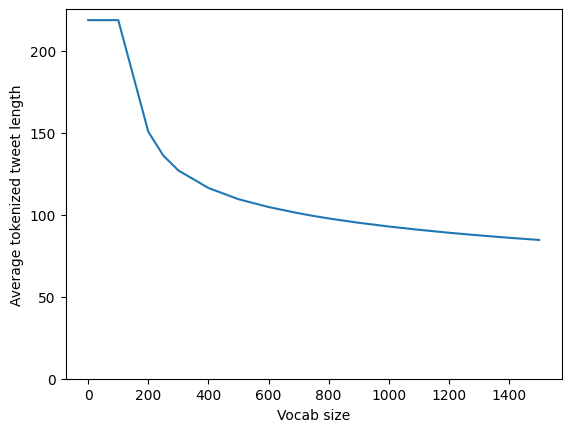

In [10]:
import matplotlib.pyplot as plt

plt.plot(sizes, ave_lengths)
plt.xlabel("Vocab size")
plt.ylabel("Average tokenized tweet length")
plt.yticks(range(0, 250, 50))
plt.show()

We can see that the average length of the tokenized tweets is approximately 2 times larger for all vocab_sizes. This is related to the different nature of the gathered data (regular tweets vs toxic comments), different language properties (different number of words in sentences, different length of words) etc. However, one can see that the overall picture is extremely similar to the picture of the tweets. This may be related to the fact that English and Russian languages share some characteristics (e.g. words are based on some roots, have endings, approximately the same number of letters in the alphabet, similar number of vowels etc.).